In [163]:
#Nnamdi Osuagwu Final Project


import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import fetch_openml
from sklearn import metrics
from sklearn.model_selection import train_test_split

%matplotlib inline


url_covid_death_conditions = "https://raw.githubusercontent.com/nnamdi2020/patternsfinal/main/data/covid-death-conditions.csv"

url_covid_death_rate = "https://raw.githubusercontent.com/nnamdi2020/patternsfinal/main/data/covid-death-rate.csv"
url_covid_sex_age_state = "https://raw.githubusercontent.com/nnamdi2020/patternsfinal/main/data/covid-sex-age-state.csv" 

# Loading dataset into Pandas DataFrame
df_covid_death_conditions = pd.read_csv(url_covid_death_conditions
                 , names=['data_as_of','start_week','end_week','state','condition_group','condition',
                          'icd10_codes','age_group','number_of_covid-19_deaths','flag'])

df_covid_sex_age_state = pd.read_csv(url_covid_sex_age_state,names=['Data as of','Start week','End Week','State',
                                                                    'Sex','Age','COVID-19 Deaths Total Deaths',
                                                                    'Pneumonia Deaths','Pneumonia and COVID-19 Deaths',
                                                                    'Influenza Deaths','Pneumonia, Influenza, or COVID-19 Deaths','Footnote'],skiprows=1)


#features = ['Pneumonia Deaths','Pneumonia and COVID-19 Deaths',
#           'Influenza Deaths','Pneumonia, Influenza, or COVID-19 Deaths']

features = ['Pneumonia Deaths','Influenza Deaths']

x = df_covid_sex_age_state.loc[:, features].values

y = df_covid_sex_age_state.loc[:,['Sex']].values

#x = StandardScaler().fit(x)
x = StandardScaler().fit_transform(x,y)

pd.DataFrame(data = x, columns = features).head(7)


#PCA Projection to 2D
pca = PCA(n_components=1)

principalDf = pd.DataFrame(data = x
             , columns = ['principal component 1', 'principal component 2'])



principalDf.head(5)











,principal component 1,principal component 2
0,33.390943,31.280149
1,-0.098918,-0.059128
2,-0.061428,0.439053
3,-0.105190,0.065417
4,-0.100913,0.116158


In [168]:
targetDf = pd.DataFrame(data = y
            , columns = ['Age'])
targetDf.head(5)

,Age
0,All Ages
1,Under 1 year
2,0-17 years
3,1-4 years
4,5-14 years


In [169]:
finalDf = pd.concat([principalDf,targetDf], axis =1 )
#finalDf = pd.concat([principalDf, df_covid_sex_age_state[['Sex']]], axis = 1)
#finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Age
0,33.390943,31.280149,All Ages
1,-0.098918,-0.059128,Under 1 year
2,-0.061428,0.439053,0-17 years
3,-0.105190,0.065417,1-4 years
4,-0.100913,0.116158,5-14 years


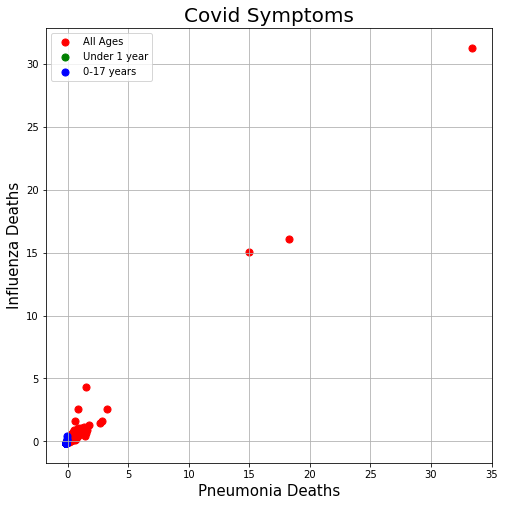

In [171]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Pneumonia Deaths', fontsize = 15)
ax.set_ylabel('Influenza Deaths', fontsize = 15)
ax.set_title('Covid Symptoms', fontsize = 20)


targets = ['All Ages','Under 1 year', '0-17 years','1-4 years','5-14 years']
colors = ['r', 'g', 'b']
for Age, color in zip(targets,colors):
    indicesToKeep = finalDf['Age'] == Age
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()